In [6]:
# ! pip install networkx
# ! pip install matplotlib
# ! pip install scipy
! pip install nose
# ! pip install --upgrade pip

# k - centers problem

## Part A : Brute Force Algorithm

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import itertools
import string
import nose
%matplotlib inline

In [8]:
# Να συμπληρώσετε τον κώδικα της συνάρτησης k_centers_objective_value(G, centers) 
# ώστε να επιστρέφει το κόστος της λύσης "centers" για τον γράφο G.

def k_centers_objective_value(G, centers):
    path = nx.multi_source_dijkstra_path_length(G, centers)
    obj_value=max(path.values())
    return obj_value

In [14]:
# Evaluate answers.

from nose.tools import assert_equal

G = nx.read_gexf('graphs01234/graph_0005_01234.gexf', node_type=int)
assert_equal(k_centers_objective_value(G, [0, 1]), 156)
assert_equal(k_centers_objective_value(G, [0, 1, 2]), 130)

G = nx.read_gexf('graphs01234/graph_0010_01234.gexf', node_type=int)
assert_equal(k_centers_objective_value(G, [2, 4]), 338)
assert_equal(k_centers_objective_value(G, [0, 1, 2]), 257)


In [15]:
def k_centers_brute_force(G, k):
    V = G.nodes
    comb = itertools.combinations(V, k)
    l=list(comb)
    g=0
    best=0
    for k in l:
        path = nx.multi_source_dijkstra_path_length(G, k)
        obj_value=max(path.values())
        if obj_value<g or g==0:
            g=obj_value
            best=k
    print("The  best solution includes the centers:",best)
    print("with max value - cost",g)
    return int(g),list(best)

In [16]:
#Evaluate Answers
G = nx.read_gexf('graphs01234/graph_0005_01234.gexf', node_type=int)
assert_equal(k_centers_brute_force(G, 2), (152, [0,3]))

G = nx.read_gexf('graphs01234/graph_0010_01234.gexf', node_type=int)
assert_equal(k_centers_brute_force(G, 2), (263, [0,8]))


The  best solution includes the centers: (0, 3)
with max value - cost 152.0
The  best solution includes the centers: (0, 8)
with max value - cost 263.0


In [17]:
def draw_k_centers_graph(G, centers = None):
    pos = nx.circular_layout(G)
    if centers == None:
        node_color = list(itertools.repeat('yellow', len(G.nodes)))
    else:
        node_color = []
        for node in G:
            if node in centers:
                node_color.append('red')
            else:
                node_color.append('yellow')
    nx.draw(G, pos, node_color = node_color, with_labels=True)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show() 

In [18]:
from timeit import default_timer

----------0005 graph & k=3----------
The  best solution includes the centers: (0, 1, 2)
with max value - cost 130.0
Execution time for graph_0005 & k=3:  0.0017906999999866002 seconds
----------0010 graph & k=3----------
The  best solution includes the centers: (1, 2, 7)
with max value - cost 201.0
Execution time for graph_0010 & k=3:  0.01646100000002093 seconds
----------0020 graph & k=3----------
The  best solution includes the centers: (13, 16, 18)
with max value - cost 390.0
Execution time for graph_0020 & k=3:  0.4622023000000013 seconds
----------0050 graph & k=3----------
The  best solution includes the centers: (5, 14, 48)
with max value - cost 639.0
Execution time for graph_0050 & k=3:  56.42180690000001 seconds


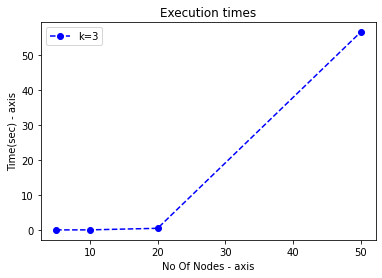

In [20]:
execution_time = {'0005':0,'0010':0,'0020':0,'0050':0}
print('----------0005 graph & k=3----------')
G5 = nx.read_gexf('graphs01234/graph_0005_01234.gexf', node_type=int)
start = default_timer()
g5=k_centers_brute_force(G5, 3)
end = default_timer()
execution_time['0005'] = end - start
print('Execution time for graph_0005 & k=3: ', execution_time['0005'],'seconds')

# 0010 graph & k=3
print('----------0010 graph & k=3----------')
G10 = nx.read_gexf('graphs01234/graph_0010_01234.gexf', node_type=int)
start = default_timer()
g10=k_centers_brute_force(G10, 3)
end = default_timer()
execution_time['0010'] = end - start
print('Execution time for graph_0010 & k=3: ', execution_time['0010'],'seconds')

# 0020 graph & k=3
print('----------0020 graph & k=3----------')
G20 = nx.read_gexf('graphs01234/graph_0020_01234.gexf', node_type=int)
start = default_timer()
g20=k_centers_brute_force(G20, 3)
end = default_timer()
execution_time['0020'] = end - start
print('Execution time for graph_0020 & k=3: ', execution_time['0020'],'seconds')

# 0050 graph & k=3
print('----------0050 graph & k=3----------')
G50 = nx.read_gexf('graphs01234/graph_0050_01234.gexf', node_type=int)
start = default_timer()
g50=k_centers_brute_force(G50, 3)
end = default_timer()
execution_time['0050'] = end - start
print('Execution time for graph_0050 & k=3: ', execution_time['0050'],'seconds')

# plot execution time for every graph
d = {int(k):float(v) for k,v in execution_time.items()}
x = list(d.keys())
y = list(d.values())

plt.plot(x, y, 'b--o',label='k=3')
plt.xlabel('No Of Nodes - axis')
plt.ylabel('Time(sec) - axis')
plt.title('Execution times')
plt.legend()
plt.show()

----------0030 graph & k=2----------
The  best solution includes the centers: (8, 16)
with max value - cost 557.0
Execution time for graph_0030 & k=2:  0.5163643999999863 seconds
----------0030 graph & k=3----------
The  best solution includes the centers: (1, 15, 16)
with max value - cost 493.0
Execution time for graph_0030 & k=3:  4.218862900000033 seconds
----------0030 graph & k=4----------
The  best solution includes the centers: (11, 12, 24, 28)
with max value - cost 417.0
Execution time for graph_0030 & k=5:  28.29362739999999 seconds
----------0030 graph & k=5----------
The  best solution includes the centers: (1, 7, 13, 28, 29)
with max value - cost 389.0
Execution time for graph_0030 & k=5:  145.5300815 seconds


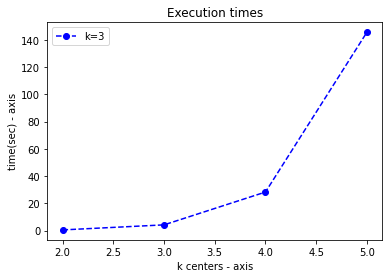

In [21]:
execution_time = {'2':0,'3':0,'4':0,'5':0}
print('----------0030 graph & k=2----------')
G30 = nx.read_gexf('graphs01234/graph_0030_01234.gexf', node_type=int)
start = default_timer()
g30=k_centers_brute_force(G30, 2)
end = default_timer()
execution_time['2'] = end - start
print('Execution time for graph_0030 & k=2: ', execution_time['2'],'seconds')

print('----------0030 graph & k=3----------')
start = default_timer()
g30=k_centers_brute_force(G30, 3)
end = default_timer()
execution_time['3'] = end - start
print('Execution time for graph_0030 & k=3: ', execution_time['3'],'seconds')

print('----------0030 graph & k=4----------')
start = default_timer()
g30=k_centers_brute_force(G30, 4)
end = default_timer()
execution_time['4'] = end - start
print('Execution time for graph_0030 & k=5: ', execution_time['4'],'seconds')

print('----------0030 graph & k=5----------')
start = default_timer()
g30=k_centers_brute_force(G30, 5)
end = default_timer()
execution_time['5'] = end - start
print('Execution time for graph_0030 & k=5: ', execution_time['5'],'seconds')

# plot execution time for every graph
d = {int(k):float(v) for k,v in execution_time.items()}
x = list(d.keys())
y = list(d.values())

plt.plot(x, y, 'b--o',label='k=3')
plt.xlabel('k centers - axis')
plt.ylabel('time(sec) - axis')
plt.title('Execution times')
plt.legend()
plt.show()

In [22]:
def k_center_brute_force_based(G, k):
    V = G.nodes
    g=0
    best=0
    for k in itertools.combinations(V, k):
        path = nx.multi_source_dijkstra_path_length(G, k)
        obj_value=max(path.values())
        if obj_value<g or g==0:
            g=obj_value
            best=k
            print("Current Solution :",best)
            print("Cost",g)
    print("The  best solution includes the centers:",best)
    print("with max value - cost",g)
    return int(g),list(best)

In [23]:
try:
    G146 = nx.read_gexf('graphs01234/graph_0146_01234.gexf', node_type=int)
    draw_k_centers_graph(G146,k_center_brute_force_based(G146,13))
except KeyboardInterrupt:
    pass
print ("Stopped")

Current Solution : (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
Cost 1114.0
Current Solution : (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14)
Cost 1109.0
Current Solution : (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 40)
Cost 1070.0
Stopped


In [ ]:
try:
    G500 = nx.read_gexf('graphs01234/graph_0500_01234.gexf', node_type=int)
    draw_k_centers_graph(G500,k_center_brute_force_based(G500,13))
except KeyboardInterrupt:
    pass
print ("Stopped")

## Part  B: Greedy Algorithm

In [ ]:
def get_key(my_dict,val):
    for key, value in my_dict.items():
         if val == value:
             return key
        
def k_centers_greedy(G, k, first_center=None, seed=None):
    l = list(G.nodes)
    if first_center==None:
        random.seed(seed)
        centers = {random.randint(l[0], l[-1])}
    else:
        centers = {first_center}
    while len(centers)<k:
        path = nx.multi_source_dijkstra_path_length(G, centers)
        max_path=max(path.values())
        new_node=get_key(path,max_path)
        centers.add(new_node)
    path = nx.multi_source_dijkstra_path_length(G, centers)
    max_path = max(path.values())
    centers=sorted(centers)
    print('Centers ', centers)
    cost = k_centers_objective_value(G,centers)
    print('Cost is ', cost)
    return max_path,centers

In [ ]:
# Evaluate Answers.

G = nx.read_gexf('graphs01234/graph_0020_01234.gexf', node_type=int)
assert_equal(k_centers_greedy(G, 3, first_center=5), (471.0, [5, 8, 15]))
assert_equal(k_centers_greedy(G, 3, first_center=8), (472.0, [8, 10, 15]))


In [ ]:
execution_time = {'0005':0,'0010':0,'0020':0,'0050':0}
print('----------0005 graph & k=3----------')
G5 = nx.read_gexf('graphs01234/graph_0005_01234.gexf', node_type=int)
start = default_timer()
g5=k_centers_greedy(G5, 3)
end = default_timer()
execution_time['0005'] = end - start
print('Execution time for graph_0005 & k=3: ', execution_time['0005'],'seconds')

# 0010 graph & k=3
print('----------0010 graph & k=3----------')
G10 = nx.read_gexf('graphs01234/graph_0010_01234.gexf', node_type=int)
start = default_timer()
g10=k_centers_greedy(G10, 3)
end = default_timer()
execution_time['0010'] = end - start
print('Execution time for graph_0010 & k=3: ', execution_time['0010'],'seconds')

# 0020 graph & k=3
print('----------0020 graph & k=3----------')
G20 = nx.read_gexf('graphs01234/graph_0020_01234.gexf', node_type=int)
start = default_timer()
g20=k_centers_greedy(G20, 3)
end = default_timer()
execution_time['0020'] = end - start
print('Execution time for graph_0020 & k=3: ', execution_time['0020'],'seconds')

# 0050 graph & k=3
print('----------0050 graph & k=3----------')
G50 = nx.read_gexf('graphs01234/graph_0050_01234.gexf', node_type=int)
start = default_timer()
g50=k_centers_greedy(G50, 3)
end = default_timer()
execution_time['0050'] = end - start
print('Execution time for graph_0050 & k=3: ', execution_time['0050'],'seconds')

# plot execution time for every graph
d = {int(k):float(v) for k,v in execution_time.items()}
x = list(d.keys())
y = list(d.values())

plt.plot(x, y, 'b--o',label='k=3')
plt.xlabel('No Of Nodes - axis')
plt.ylabel('Time(sec) - axis')
plt.title('Execution times')
plt.legend()
plt.show()

In [ ]:
execution_time = {'2':0,'3':0,'4':0,'5':0}
print('----------0030 graph & k=2----------')
G30 = nx.read_gexf('graphs01234/graph_0030_01234.gexf', node_type=int)
start = default_timer()
g30=k_centers_greedy(G30, 2)
end = default_timer()
execution_time['2'] = end - start
print('Execution time for graph_0030 & k=2: ', execution_time['2'],'seconds')

print('----------0030 graph & k=3----------')
start = default_timer()
g30=k_centers_greedy(G30, 3)
end = default_timer()
execution_time['3'] = end - start
print('Execution time for graph_0030 & k=3: ', execution_time['3'],'seconds')

print('----------0030 graph & k=4----------')
start = default_timer()
g30=k_centers_greedy(G30, 4)
end = default_timer()
execution_time['4'] = end - start
print('Execution time for graph_0030 & k=5: ', execution_time['4'],'seconds')

print('----------0030 graph & k=5----------')
start = default_timer()
g30=k_centers_greedy(G30, 5)
end = default_timer()
execution_time['5'] = end - start
print('Execution time for graph_0030 & k=5: ', execution_time['5'],'seconds')

# plot execution time for every graph
d = {int(k):float(v) for k,v in execution_time.items()}
x = list(d.keys())
y = list(d.values())

plt.plot(x, y, 'b--o',label='k=3')
plt.xlabel('k centers - axis')
plt.ylabel('time(sec) - axis')
plt.title('Execution times')
plt.legend()
plt.show()

In [ ]:
def randomString(stringLength=8):
    letters = string.ascii_lowercase
    return ''.join(random.choice(letters) for i in range(stringLength))

previous_scores=[99999999]
costs = [99999999]

def k_center_greedy_based(G, k,first_center=None,seed=None):
    l = list(G.nodes)
    if first_center==None:
        random.seed(seed)
        centers = {random.randint(l[0], l[-1])}
    else:
        centers = {first_center}
        
    while len(centers)<k:
        path = nx.multi_source_dijkstra_path_length(G, centers)
        max_path=max(path.values())
        new_node=get_key(path,max_path)
        centers.add(new_node)
    path = nx.multi_source_dijkstra_path_length(G, centers)
    max_path = max(path.values())
    centers=sorted(centers)
    cost = k_centers_objective_value(G,centers)
    if(min(costs) > cost):
        previous_scores.append([cost,centers])
        costs.append(cost)
        string = str(centers).strip('[]')
        print("NEW SCORE(seed: ",seed,"): ",cost, " with centers ",string )
    return max_path,centers

In [ ]:
try:
    while(1):
        seed = randomString()
        k_center_greedy_based(G146,13,seed=seed)#run for G500
except KeyboardInterrupt:
    pass
print ("Stopped")

In [ ]:
try:
    while(1):
        seed = randomString()
        k_center_greedy_based(G500,13,seed=seed)#run for G500
except KeyboardInterrupt:
    pass
print ("Stopped")

Choosing a random starting point we move to the furthest one, cost-wise, until we have chosen k centers

In [33]:
def k_center_algorithm(G, k,seed=None,generator=10):
    best_cost = 9999999
    if seed==None:
        seed = randomString()
    rnd = random.seed(seed)
    for i in range (generator):
        nodes=random.choices(list(G.nodes),k=k)
        cost=k_centers_objective_value(G,nodes)
        if cost<best_cost:
            best_cost=cost
            best_centers=nodes
    print("NEW SCORE( seed: ",seed," ): ",str(best_cost), " with centers ",str(best_centers).strip('[]') ,' generating ', str(generator), ' different lists')
    return best_centers, best_cost

In [44]:
def values_experimentation(G, seed = randomString()):
    index = 0;
    gen_values = [10,20,50,100,200,300,500,1000,2000,5000]
    costs = []
    for gen in gen_values:
        centers,cost = k_center_algorithm(G,13,seed = seed,generator=gen)
        costs.append(cost)  
    string = 'seed = '+seed
    plt.plot(gen_values, costs, 'r--o',label=string)
    plt.xlabel('Generator Values - axis')
    plt.ylabel('Minimum Cost Valeus - axis')
    plt.title('Execution times')
    plt.legend()
    plt.show()
    return centers,cost

NEW SCORE( seed:  oususigg  ):  1021.0  with centers  91, 83, 122, 59, 129, 9, 3, 106, 17, 89, 70, 69, 18  generating  10  different lists
NEW SCORE( seed:  oususigg  ):  1021.0  with centers  91, 83, 122, 59, 129, 9, 3, 106, 17, 89, 70, 69, 18  generating  20  different lists
NEW SCORE( seed:  oususigg  ):  949.0  with centers  138, 68, 77, 54, 78, 6, 83, 119, 56, 40, 35, 139, 145  generating  50  different lists
NEW SCORE( seed:  oususigg  ):  949.0  with centers  138, 68, 77, 54, 78, 6, 83, 119, 56, 40, 35, 139, 145  generating  100  different lists
NEW SCORE( seed:  oususigg  ):  933.0  with centers  30, 54, 73, 82, 25, 117, 83, 133, 55, 59, 53, 140, 34  generating  200  different lists
NEW SCORE( seed:  oususigg  ):  919.0  with centers  38, 110, 144, 10, 48, 53, 135, 83, 90, 44, 87, 134, 54  generating  300  different lists
NEW SCORE( seed:  oususigg  ):  914.0  with centers  68, 56, 105, 38, 106, 136, 128, 53, 91, 14, 73, 120, 106  generating  500  different lists
NEW SCORE( see

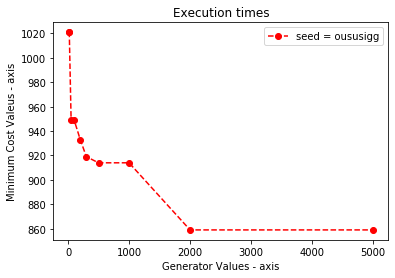

Finished
([135, 118, 145, 134, 81, 66, 144, 17, 50, 108, 32, 104, 67], 859.0)


In [45]:
try:
    centers146 = values_experimentation(G=G146)
except KeyboardInterrupt:
    pass
print ("Finished")
print(centers146)

NEW SCORE( seed:  oususigg  ):  2570.0  with centers  95, 97, 53, 59, 120, 242, 395, 400, 149, 314, 30, 304, 166  generating  10  different lists
NEW SCORE( seed:  oususigg  ):  2570.0  with centers  95, 97, 53, 59, 120, 242, 395, 400, 149, 314, 30, 304, 166  generating  20  different lists
NEW SCORE( seed:  oususigg  ):  2570.0  with centers  95, 97, 53, 59, 120, 242, 395, 400, 149, 314, 30, 304, 166  generating  50  different lists
NEW SCORE( seed:  oususigg  ):  2393.0  with centers  333, 314, 81, 449, 114, 325, 396, 160, 291, 131, 446, 97, 28  generating  100  different lists
NEW SCORE( seed:  oususigg  ):  2333.0  with centers  291, 351, 378, 52, 404, 113, 315, 212, 328, 366, 9, 266, 170  generating  200  different lists
NEW SCORE( seed:  oususigg  ):  2333.0  with centers  291, 351, 378, 52, 404, 113, 315, 212, 328, 366, 9, 266, 170  generating  300  different lists
NEW SCORE( seed:  oususigg  ):  2333.0  with centers  291, 351, 378, 52, 404, 113, 315, 212, 328, 366, 9, 266, 170 

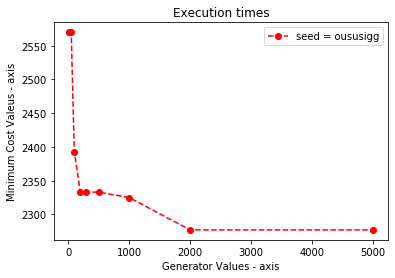

Finished


In [46]:
try:
    centers500 = values_experimentation(G=G500)
except KeyboardInterrupt:
    pass
print ("Finished")

In [51]:
def further_optim(G,centers):
    found=0
    cost_to_beat=k_centers_objective_value(G,centers)
    while found==0:
        print('\nBaseline solution - centers: ',centers,' with cost: ',cost_to_beat)
        for node in centers: 
            for neighbor in range (len(G.nodes)):
                found_replacement=[neighbor if x==node else x for x in centers]
                if k_centers_objective_value(G,found_replacement)<cost_to_beat:
                    new_best_centers=found_replacement
                    cost_to_beat=k_centers_objective_value(G,new_best_centers)
                    print('Current Best Solution - centers: ',new_best_centers,' with cost: ',cost_to_beat)     
        if new_best_centers==centers:
            found=1   
        centers=new_best_centers 
    return centers,cost_to_beat

In [52]:
try:
    centers_final_146 = further_optim(G146,centers146[0])
except KeyboardInterrupt:
    pass
print ("Finished")
print(centers_final_146)


Baseline solution - centers:  [135, 118, 145, 134, 81, 66, 144, 17, 50, 108, 32, 104, 67]  with cost:  859.0
Current Best Solution - centers:  [135, 118, 145, 134, 81, 66, 144, 5, 50, 108, 32, 104, 67]  with cost:  858.0

Baseline solution - centers:  [135, 118, 145, 134, 81, 66, 144, 5, 50, 108, 32, 104, 67]  with cost:  858.0
Current Best Solution - centers:  [135, 118, 145, 10, 81, 66, 144, 5, 50, 108, 32, 104, 67]  with cost:  850.0

Baseline solution - centers:  [135, 118, 145, 10, 81, 66, 144, 5, 50, 108, 32, 104, 67]  with cost:  850.0
Current Best Solution - centers:  [135, 118, 38, 10, 81, 66, 144, 5, 50, 108, 32, 104, 67]  with cost:  842.0

Baseline solution - centers:  [135, 118, 38, 10, 81, 66, 144, 5, 50, 108, 32, 104, 67]  with cost:  842.0
Current Best Solution - centers:  [135, 118, 38, 10, 1, 66, 144, 5, 50, 108, 32, 104, 67]  with cost:  839.0

Baseline solution - centers:  [135, 118, 38, 10, 1, 66, 144, 5, 50, 108, 32, 104, 67]  with cost:  839.0
Current Best Solut

In [53]:
try:
    centers_final_500 = further_optim(G500,centers500[0])
except KeyboardInterrupt:
    pass
print ("Finished")
print(centers_final_500)


Baseline solution - centers:  [111, 210, 202, 356, 3, 225, 441, 52, 494, 99, 125, 45, 348]  with cost:  2277.0
Current Best Solution - centers:  [111, 210, 118, 356, 3, 225, 441, 52, 494, 99, 125, 45, 348]  with cost:  2248.0

Baseline solution - centers:  [111, 210, 118, 356, 3, 225, 441, 52, 494, 99, 125, 45, 348]  with cost:  2248.0
Current Best Solution - centers:  [111, 210, 118, 0, 3, 225, 441, 52, 494, 99, 125, 45, 348]  with cost:  2238.0
Current Best Solution - centers:  [111, 210, 118, 356, 203, 225, 441, 52, 494, 99, 125, 45, 348]  with cost:  2197.0

Baseline solution - centers:  [111, 210, 118, 356, 203, 225, 441, 52, 494, 99, 125, 45, 348]  with cost:  2197.0
Current Best Solution - centers:  [111, 210, 118, 5, 203, 225, 441, 52, 494, 99, 125, 45, 348]  with cost:  2185.0

Baseline solution - centers:  [111, 210, 118, 5, 203, 225, 441, 52, 494, 99, 125, 45, 348]  with cost:  2185.0
Current Best Solution - centers:  [111, 210, 422, 5, 203, 225, 441, 52, 494, 99, 125, 45, 

YOUR ANSWER HERE

 **k_center_algorithm(G, k, seed=None)**: 
1. create random lists of size k as possible solutions
2. number of lists defined by vaue of generator
3. every list will create k centers 
4. for every list we calulcate cost and keep the best one as our current solution, using a random seed as a starter

**values_experimentation(G, seed = randomString()):**: 
1. for a specific seed get all possible solutions from k_center_algorithm
2. we will keep the seeds after visualizing the best results

**optimize_random_solution(G,centers)**:
1. optimizing solutions found in previous steps
2. changing all centers until we hit an optimal solution / better cost, only one at a time
3. termination when no edge changes anymore 